In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [21]:
df = pd.read_csv("Mall_Customers.csv")  
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:

# dbscan = DBSCAN(eps=0.8, min_samples=5)

# dbscan = DBSCAN(eps=0.4, min_samples=10)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)


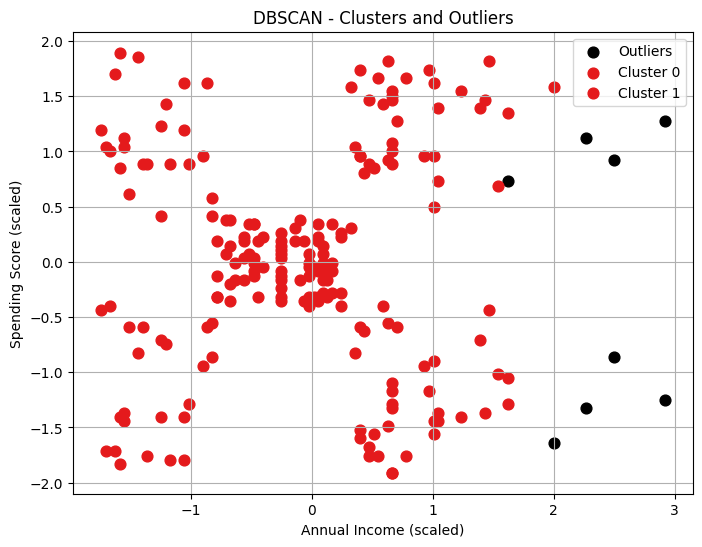

In [24]:
plt.figure(figsize=(8,6))
unique_labels = np.unique(labels)

for label in unique_labels:
    color = 'black' if label == -1 else plt.cm.Set1(label / 10.)
    plt.scatter(X_scaled[labels == label, 0],
                X_scaled[labels == label, 1],
                c=[color],
                label=f'Cluster {label}' if label != -1 else 'Outliers',
                s=60)

plt.title('DBSCAN - Clusters and Outliers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()
